In [474]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec

# Data

Creating Dataset for Logistic Regression

In [475]:
x1 = []
x2 = []
for i in range(1, 100, 2):
    x1.append(i)
for i in range(83, 583, 10):
    x2.append(i)
target = ['Approved']*13 + ['Onhold']*13 + ['Reject']*24
ind=[0,4,10,15,20,25,30,35,40,45]
val=[76,140,200,200,300,350,400,400,500,550]
for i,value in zip(ind,val):
    x2[i] = value
for i in range(len(x2)):
    if(i%2!=0):
        x2[i]+=2
for i in range(len(x1)):
    if(i%2!=0):
        x1[i]+=5

In [476]:
ds = pd.DataFrame({'x1':x1,'x2':x2,'target':target})
ds

,x1,x2,target
0,1,76,Approved
1,8,95,Approved
2,5,103,Approved
3,12,115,Approved
4,9,140,Approved
5,16,135,Approved
6,13,143,Approved
7,20,155,Approved
8,17,163,Approved
9,24,175,Approved


Converts numeric class into string class

In [477]:
def conv_n2c(data):
    for i in range(len(data.iloc[:,-1])):
        if data.iloc[:,-1][i] == '0' or data.iloc[:,-1][i] == 0 :
            data.iloc[:,-1][i] = 'Approved'
        elif data.iloc[:,-1][i] == '1' or data.iloc[:,-1][i] == 1:
            data.iloc[:,-1][i] = 'Onhold'
        elif data.iloc[:,-1][i] == '2' or data.iloc[:,-1][i] == 2:
            data.iloc[:,-1][i] = 'Reject'   

Plotting Dataset

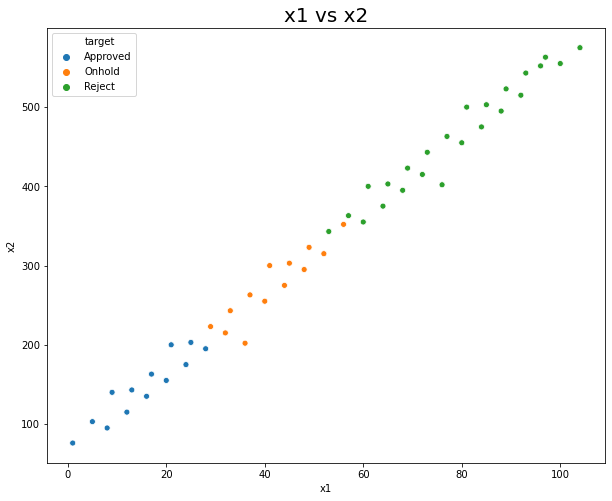

In [478]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=ds, x='x1', y='x2', hue='target')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2', fontsize=20)
ax = plt.gca()
plt.show()

Storing features and Target seperately

In [479]:
X = ds[['x1','x2']]
y = ds['target']

Lets encode the target

In [528]:
for i in range(len(ds['target'])):
    if ds['target'][i] == 'Approved':
        ds['target'][i]='0'
    if ds['target'][i] == 'Onhold':
        ds['target'][i]='1'
    if ds['target'][i] == 'Reject':
        ds['target'][i]='2'
ds['target']=ds['target'].astype(np.int_)

In [481]:
ds.dtypes

x1        int64
x2        int64
target    int32
dtype: object

Splitting Data into train and test Dataset

In [482]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [483]:
len(X_train),len(X_test)

(40, 10)

Scaling the features using standard scaler

In [484]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Performing Logistic Regression

In [485]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [486]:
x1p=log.coef_[0][0]
x2p=log.coef_[0][1]

In [487]:
x1p,x2p

(-1.55367495687959, -1.4709259911044539)

In [488]:
xint=log.intercept_
xint

array([-1.47368264,  0.96700455,  0.50667808])

# Training Data Visualization

In [489]:
y_train=y_train.values

In [490]:
pred_train = pd.DataFrame({'x1':X_train[:,:1].flatten(), 'x2':X_train[:,1:2].flatten(), 'target': y_train})

In [526]:
conv_n2c(pred_train)

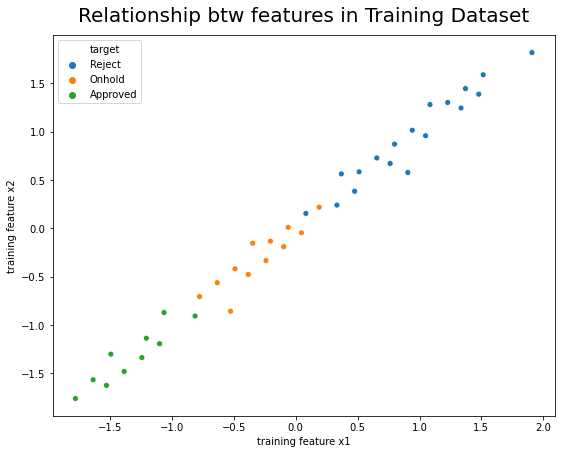

In [492]:
plt.figure(figsize=(9,7))
sns.scatterplot(data = pred_train ,x='x1',y='x2', hue='target')
plt.xlabel('training feature x1')
plt.ylabel('training feature x2')
plt.title('Relationship btw features in Training Dataset',x=0.5,y=1.02, fontsize=20)
plt.show()

In [493]:
predictions = {"x1": X_train[:,0].flatten(),
                 "training Dataset Prediction Pb": log.predict_proba(X_train)[:,2]}
df_predictions = pd.DataFrame(predictions)

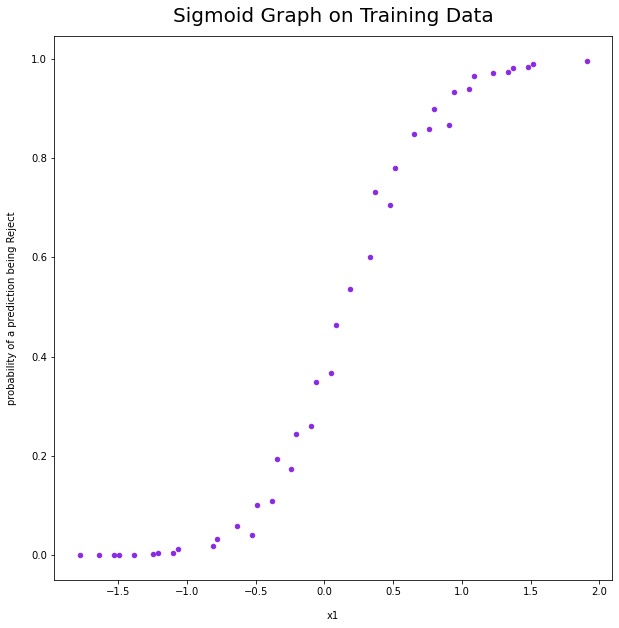

In [494]:
ax = df_predictions.plot.scatter(x="x1", y="training Dataset Prediction Pb", figsize=(10, 10), c='blueviolet')
plt.title("Sigmoid Graph on Training Data", y=1.015, fontsize=20)
plt.xlabel("x1", labelpad=14)
plt.ylabel("probability of a prediction being Reject", labelpad=14);

# Comparing Actual and Predicted values

In [495]:
pred_1=log.predict(X_test)

In [496]:
y_test=y_test.values

In [497]:
pred_test = pd.DataFrame({'target': y_test, 'prediction' : pred_1})

In [498]:
pred_test

,target,prediction
0,0,0
1,2,2
2,0,0
3,2,2
4,2,2
5,2,2
6,1,1
7,2,2
8,2,2
9,0,0


# Calculating Loss

Accuracy Score

In [499]:
accuracy_test_set = log.score(X_test, y_test)
accuracy_test_set

1.0

Confusion Matrix

In [500]:
class_names = [0, 1]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, log.predict(X_test))
cnf_matrix

array([[3, 0, 0],
       [0, 1, 0],
       [0, 0, 6]], dtype=int64)

In [501]:
from sklearn.metrics import recall_score # also called f1 score
recall = recall_score(y_test, pred_1, average='micro')
print("Recall:", round(recall, 2))

Recall: 1.0


# Data Visualization

In [525]:
conv_n2c(ds)

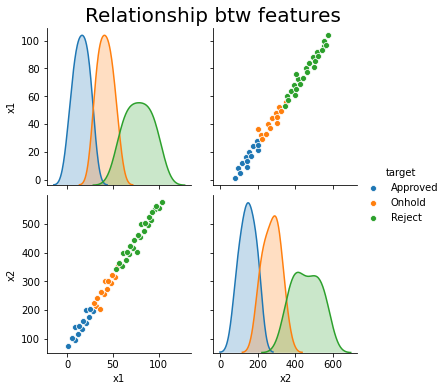

In [503]:
sns.pairplot(ds, kind="scatter", hue="target")
plt.title('Relationship btw features',x=0,y=5, fontsize=20)
plt.show()

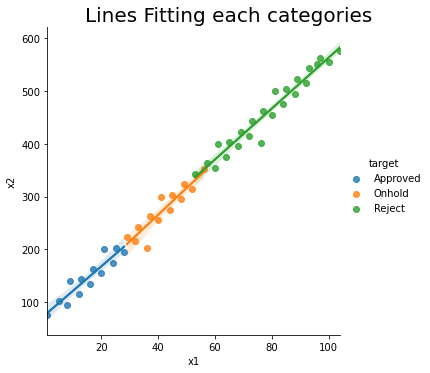

In [504]:
sns.lmplot(x="x1", y="x2", data=ds, fit_reg=True, hue='target', legend=True)
plt.title('Lines Fitting each categories',x=0.62,y=5, fontsize=20)
plt.show()

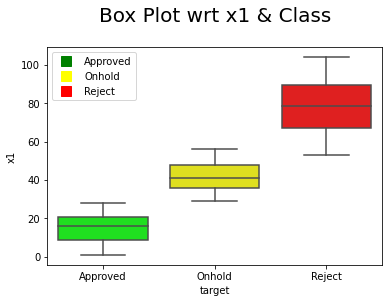

In [505]:
colors = ["#00FF00","#FFFF00" ,"#FF0000"] 
sns.boxplot(x=ds["target"], y=ds["x1"], palette=colors)
legend_labels = {'0': 'Approved', '1': 'Onhold', '2': 'Reject'}
handles = [plt.Line2D([], [], color='green', marker='s', linestyle='None', markersize=10),
           plt.Line2D([], [], color='yellow', marker='s', linestyle='None', markersize=10),
           plt.Line2D([], [], color='red', marker='s', linestyle='None', markersize=10)]
labels = [legend_labels['0'], legend_labels['1'], legend_labels['2']]
plt.legend(handles, labels)
plt.title('Box Plot wrt x1 & Class',x=0.5,y=1.09, fontsize=20)
plt.show()

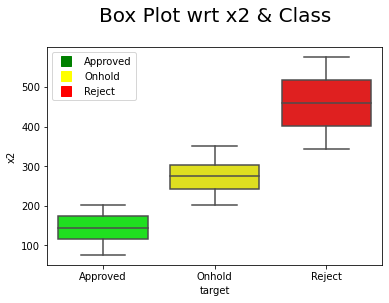

In [506]:
colors = ["#00FF00","#FFFF00" ,"#FF0000"] 
sns.boxplot(x=ds["target"], y=ds["x2"], palette=colors)
legend_labels = {'0': 'Approved', '1': 'Onhold', '2': 'Reject'}
handles = [plt.Line2D([], [], color='green', marker='s', linestyle='None', markersize=10),
           plt.Line2D([], [], color='yellow', marker='s', linestyle='None', markersize=10),
           plt.Line2D([], [], color='red', marker='s', linestyle='None', markersize=10)]
labels = [legend_labels['0'], legend_labels['1'], legend_labels['2']]
plt.legend(handles, labels)
plt.title('Box Plot wrt x2 & Class',x=0.5,y=1.09, fontsize=20)
plt.show()

In [507]:
x_min, x_max = X_train[:,:1].min() - 1, X_train[:,:1].max() + 1
y_min, y_max = X_train[:,1:2].min() - 1, X_train[:,1:2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

In [508]:
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [509]:
Z = log.predict(grid_points)
Z = Z.reshape(xx.shape)

In [510]:
train_ds = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1], 'target': y_train})

In [524]:
conv_n2c(train_ds)

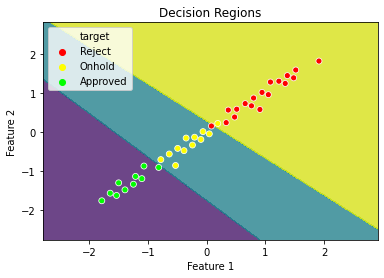

In [512]:
# Plot the decision regions
colors = ["#FF0000","#FFFF00", "#00FF00"] 
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(data=train_ds, x='x1', y='x2', hue='target', palette=colors)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')
plt.show()

In [513]:
x1 = X.values
y1 = y.values

In [514]:
yx=[]
for i in range(len(y1)):
    yx.append(int(y1[i]))

In [515]:
y1=yx
y1=np.array(y1)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [516]:
type(x1[0][0]),type(y1[0])

(numpy.int64, numpy.int32)

In [517]:
len(X)

50

In [518]:
clf1 = LogisticRegression(random_state=3,
                          solver='newton-cg',
                          multi_class='multinomial')
clf1.fit(x1, y1)

LogisticRegression(multi_class='multinomial', random_state=3,
                   solver='newton-cg')

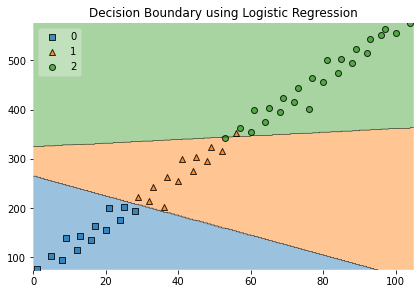

In [519]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X = x1, y = y1, clf=clf1, legend=2)
plt.title("Decision Boundary using Logistic Regression")
plt.show()


In [520]:
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC()
clf2.fit(x1, y1)
clf3.fit(x1, y1)
clf4.fit(x1, y1)

SVC()

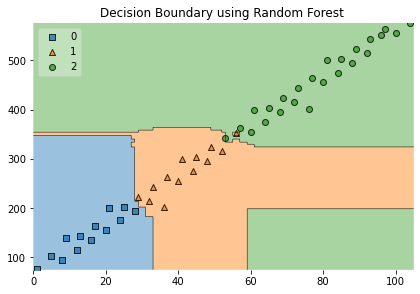

In [521]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X = x1, y = y1, clf=clf2, legend=2)
plt.title("Decision Boundary using Random Forest ")
plt.show()

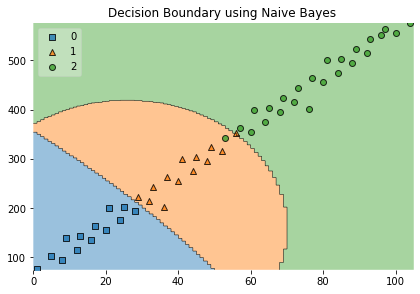

In [522]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X = x1, y = y1, clf=clf3, legend=2)
plt.title("Decision Boundary using Naive Bayes ")
plt.show()

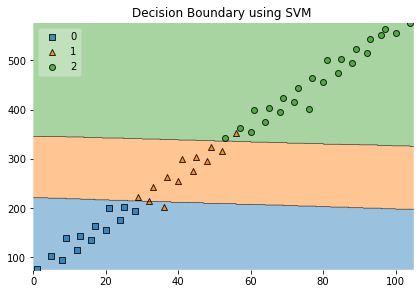

In [523]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X = x1, y = y1, clf=clf4, legend=2)
plt.title("Decision Boundary using SVM ")
plt.show()